# Durchschnittliche Wortanzahl pro Genre

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('lyrics_clean_utf8.csv',encoding ='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259793 entries, 0 to 259792
Data columns (total 7 columns):
Unnamed: 0                      259793 non-null int64
song                            259792 non-null object
year                            259793 non-null int64
genre                           259793 non-null object
word_tokenize_no_punctuation    259793 non-null object
word_tokenize_length            259793 non-null int64
word_tokenize_no_stopwords      259793 non-null object
dtypes: int64(3), object(4)
memory usage: 13.9+ MB


## Entfernen von Trennzeichen
Entfernen der CSV Trenzeichen ' und "

In [3]:
df['word_tokenize_no_punctuation'] = df['word_tokenize_no_punctuation'].str.replace("'",'')
df['word_tokenize_no_punctuation'] = df['word_tokenize_no_punctuation'].str.replace('"','')
df['word_tokenize_no_stopwords'] = df['word_tokenize_no_stopwords'].str.replace("'",'')
df['word_tokenize_no_stopwords'] = df['word_tokenize_no_stopwords'].str.replace('"','')
df['word_tokenize_no_stopwords_wordcount'] = df['word_tokenize_no_stopwords'].str.split().str.len()
df.head()

,Unnamed: 0,song,year,genre,word_tokenize_no_punctuation,word_tokenize_length,word_tokenize_no_stopwords,word_tokenize_no_stopwords_wordcount
0,0,ego-remix,2009,Pop,"[oh, baby, how, you, doing, you, know, i, m, g...",474,"[oh, baby, know, m, gon, na, cut, right, chase...",229
1,1,then-tell-me,2009,Pop,"[playin, everything, so, easy, it, s, like, yo...",270,"[playin, everything, easy, s, like, seem, sure...",129
2,2,honesty,2009,Pop,"[if, you, search, for, tenderness, it, is, nt,...",177,"[search, tenderness, nt, hard, find, love, nee...",81
3,3,you-are-my-rock,2009,Pop,"[oh, oh, oh, i, oh, oh, oh, i, verse, 1, if, i...",555,"[oh, oh, oh, oh, oh, oh, verse, 1, wrote, book...",272
4,4,black-culture,2009,Pop,"[party, the, people, the, people, the, party, ...",338,"[party, people, people, party, s, popping, sit...",189


## Zusammenfassen und Beschreiben
describe() gibt zurück:  count: Anzahl der Objekte, mean: Durchschnitt, std: Standartabweichung, min-max: Angabe des wertes bei min, 25%, 50%, 75%, max

### Mit Füllwörtern nach Genre zusammengefasst
mit describe() alle Lieder des selben Jahres beschrieben

In [4]:
grouped_by_genre = df['word_tokenize_length'].groupby(df['genre']).describe()
grouped_by_genre

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14290.0,198.553814,87.220557,15.0,137.00,181.0,245.0,1472.0
Electronic,7468.0,216.588913,139.685668,15.0,118.00,189.0,281.0,1436.0
Folk,2077.0,201.969186,109.625049,15.0,128.00,183.0,255.0,1372.0
Hip-Hop,24573.0,514.681358,230.194296,15.0,360.00,509.0,659.0,1493.0
Indie,3097.0,211.093962,112.057833,15.0,136.00,194.0,261.0,1287.0
Jazz,7810.0,185.137772,100.874242,15.0,116.00,162.0,227.0,1116.0
Metal,22569.0,183.772874,111.232504,15.0,111.00,162.0,230.0,1150.0
Not Available,22659.0,231.018183,133.990621,15.0,142.00,203.0,290.0,1397.0
Other,5145.0,236.000000,143.583744,15.0,134.00,203.0,301.0,1459.0


### Ohne Füllwörtern nach Genre zusammengefasst
mit describe() alle Lieder des selben Jahres beschrieben

In [5]:
grouped_by_genre_ohne = df['word_tokenize_no_stopwords_wordcount'].groupby(df['genre']).describe()
grouped_by_genre_ohne

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14290.0,102.702449,48.586327,6.0,68.0,92.0,126.0,801.0
Electronic,7468.0,118.841457,82.964026,1.0,62.0,100.0,151.0,726.0
Folk,2077.0,115.400096,63.295856,9.0,72.0,102.0,146.0,775.0
Hip-Hop,24573.0,299.972490,140.036893,7.0,205.0,296.0,386.0,1241.0
Indie,3097.0,109.675492,70.787260,6.0,67.0,98.0,135.0,1014.0
Jazz,7810.0,100.742638,61.480891,2.0,60.0,85.0,125.0,640.0
Metal,22569.0,102.347423,63.744560,4.0,62.0,89.0,126.0,652.0
Not Available,22659.0,137.426718,82.303346,3.0,82.0,120.0,172.0,1199.0
Other,5145.0,145.757823,101.112140,8.0,75.0,120.0,188.0,887.0


## Ausgabe der Ergebnisse

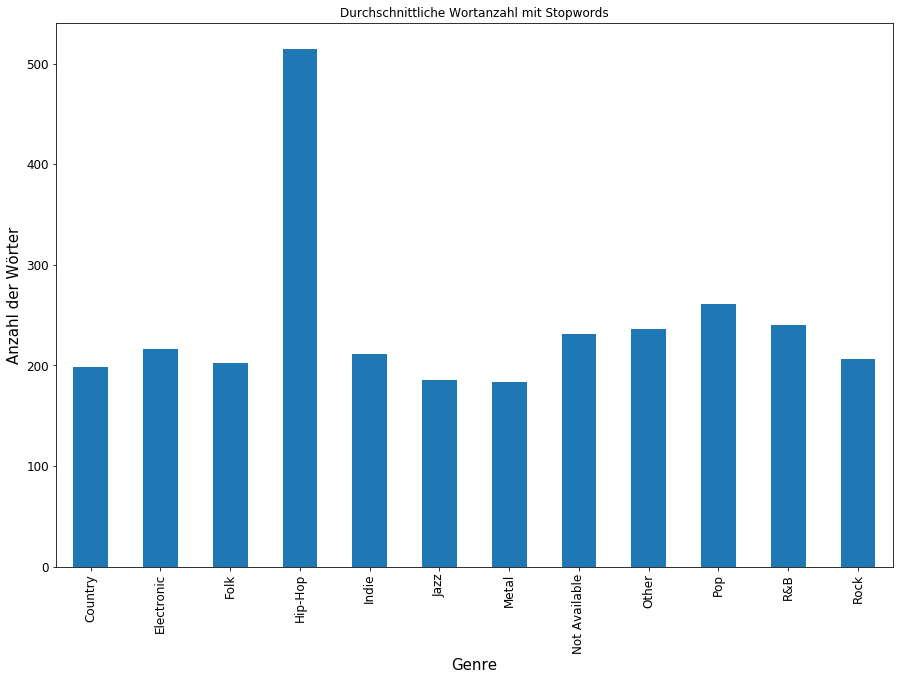

In [6]:
import matplotlib.pyplot as plt
plot_genre = grouped_by_genre['mean'].plot(kind='bar', title ="Durchschnittliche Wortanzahl mit Stopwords", figsize=(15, 10), fontsize=12)
plot_genre.set_xlabel("Genre", fontsize=15)
plot_genre.set_ylabel("Anzahl der Wörter", fontsize=15)

plt.show()

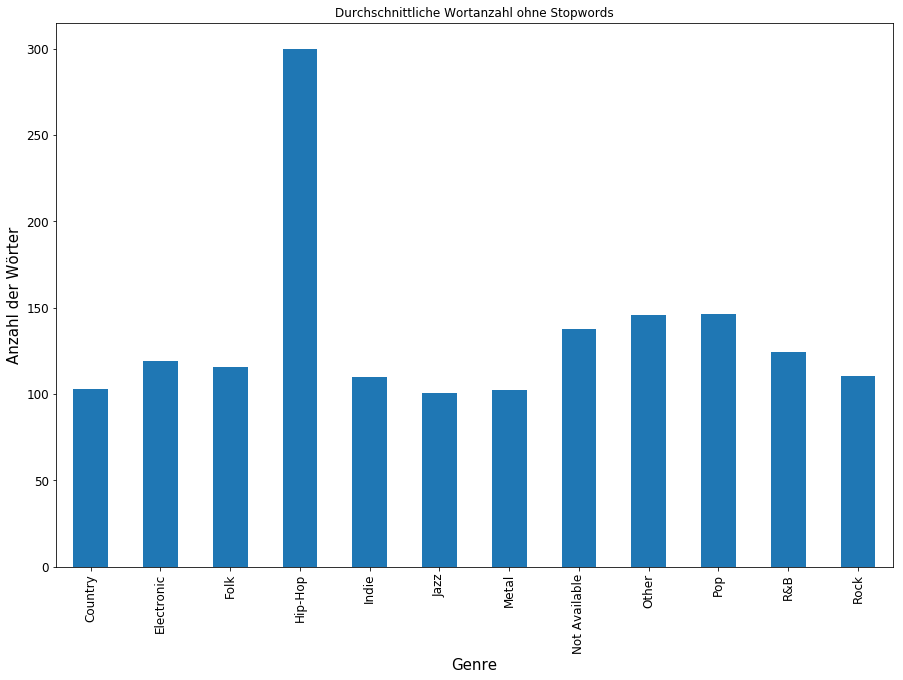

In [7]:
import matplotlib.pyplot as plt
plot_genre_ohne = grouped_by_genre_ohne['mean'].plot(kind='bar', title ="Durchschnittliche Wortanzahl ohne Stopwords", figsize=(15, 10), fontsize=12)
plot_genre_ohne.set_xlabel("Genre", fontsize=15)
plot_genre_ohne.set_ylabel("Anzahl der Wörter", fontsize=15)

plt.show()

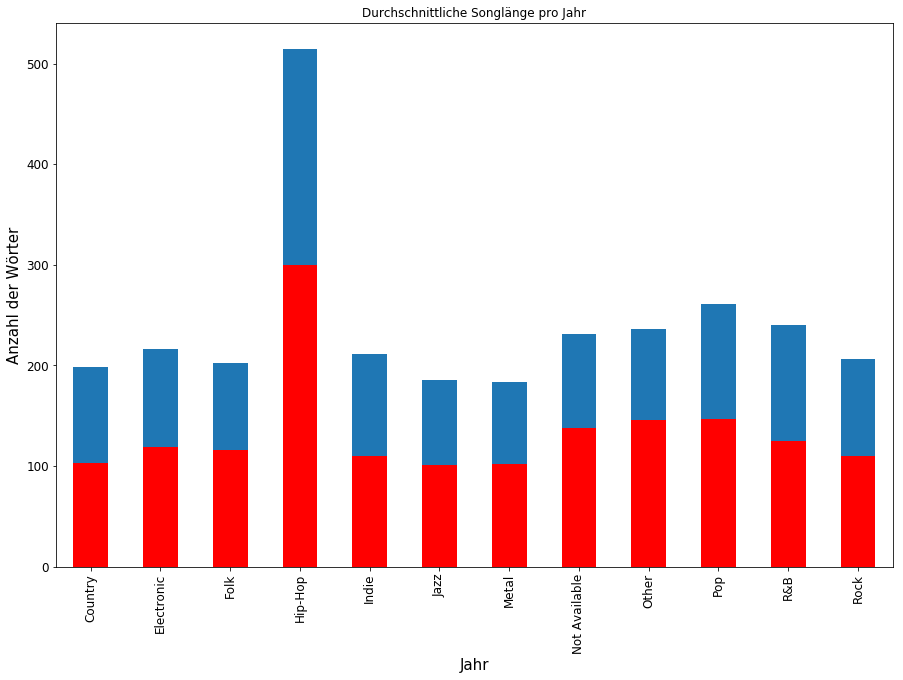

In [8]:
fig = plt.figure()
plot_combine = grouped_by_genre['mean'].plot(kind='bar', title ="Durchschnittliche Songlänge pro Genre", figsize=(15, 10), fontsize=12)
plot_combine = grouped_by_genre_ohne['mean'].plot(kind='bar',color = 'red' ,title ="Durchschnittliche Songlänge pro Jahr", figsize=(15, 10), fontsize=12)
plot_combine.set_xlabel("Jahr", fontsize=15)
plot_combine.set_ylabel("Anzahl der Wörter", fontsize=15)
plt.show()

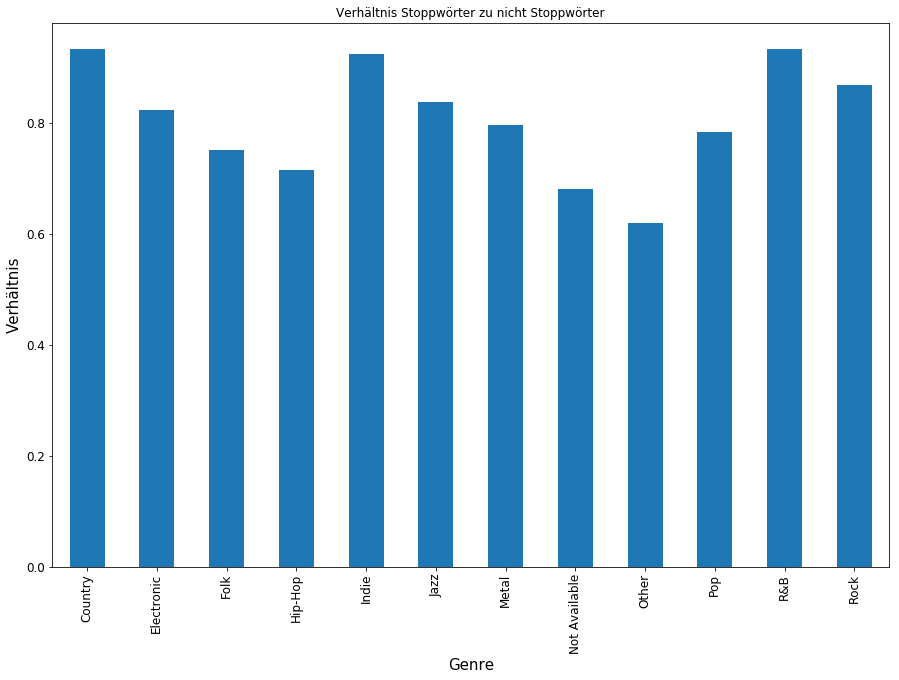

In [11]:
fig = plt.figure()
plot_combine = ((grouped_by_genre['mean']-grouped_by_genre_ohne['mean'])/grouped_by_genre_ohne['mean']).plot(kind='bar', title ="Verhältnis Stoppwörter zu nicht Stoppwörter", figsize=(15, 10), fontsize=12)
plot_combine.set_xlabel("Genre", fontsize=15)
plot_combine.set_ylabel("Verhältnis", fontsize=15)
plt.show()